#### Exercício 1
###### Até agora, na nossa exploração dos dados automotivos com gráficos de dispersão, focamos a relação entre preço e mpg da cidade. Neste exercício, você criará gráficos para algumas colunas adicionais:

- Mude pelo menos uma das opções de cores.
- Ligue para a função auto_color com uma lista de colunas diferentes: ***['engine-size', 'curb-weight']***.
- Examine os plots resultantes. O que você pode aprender com essas plots?

In [1]:
def read_auto_data(fileName = "Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
#    auto_prices[cols] = auto_prices[cols].as_type(int64)
        
    return auto_prices
auto_prices = read_auto_data()

In [2]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(auto_prices[['engine-size', 'curb-weight']], ax = ax, cmap="Blues_d")
ax.set_title('KDE plot of auto engine size and price') # Give the plot a main title
ax.set_xlabel('Engine Size') # Set text for the x axis
ax.set_ylabel('curb-weight')# Set text for y axis

ImportError: No module named seaborn

In [0]:
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red') 
    ax.set_title('Scatter plot of price vs. ' + col)
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return 'Done'
auto_color(auto_prices, ['engine-size'])

In [0]:
auto_color(auto_prices, ['curb-weight'])

#### Exercício 2
###### Você já viu vários exemplos de usar a estética do gráfico para destacar vários relacionamentos no conjunto de dados. Você pode continuar a explorar o conjunto de dados usando a estética. Experimente o seguinte:

- Copie o código usado para o plano de violino em uma nova célula.
- Altere o grupo x por variável para "wheel-base".
- Examine o plot resultante. Qual a nova informação agora aparente?

NameError: name 'sns' is not defined

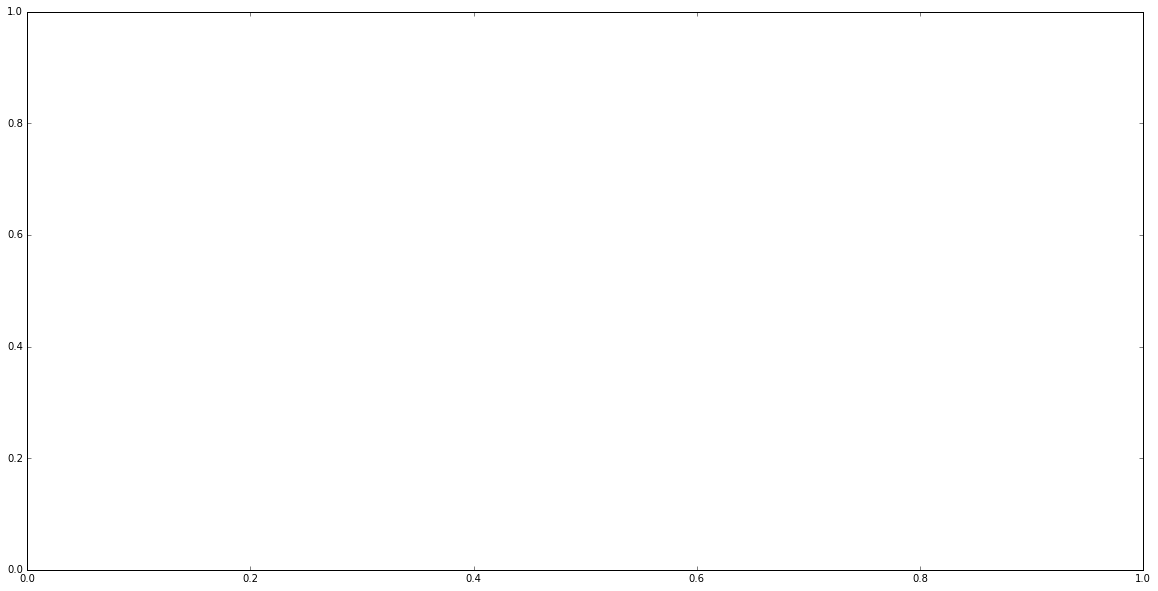

In [4]:
fig = plt.figure(figsize=(20,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'wheel-base', y = 'engine-size', data = auto_prices, ax = ax)
ax.set_title('Violine plots of auto engine size by wheel-base') # Give the plot a main title
ax.set_xlabel('Wheel-base') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

#### Exercício 3
###### Agora é sua vez de tentar alguns plots com densidades nas margens. Faça o seguinte:

- Altere a variável do eixo x para 'city-mpg'.
- Examine o plot resultante. Qual a nova informação agora aparente?

In [8]:
sns.set_style("whitegrid")
sns.jointplot('city-mpg', 'price', data = auto_prices, alpha = 0.3)

NameError: name 'sns' is not defined

O gráfico mostra que quanto mais caro o carro, mais combustível ele gastará, e que a maioria dos carros é intermediária no preço e no consumo de combustível